<a href="https://colab.research.google.com/github/AtharvaSurve127/Air-Quality-Index-predictor/blob/main/Air_Quality_Index_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [297]:
air_quality_data = pd.read_csv('AirQualityUCI.csv',sep=';',decimal=',')
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [298]:
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [299]:
air_quality_data.loc[[9356]]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,NaN,NaN


In [300]:
air_quality_data = air_quality_data.head(9357)

In [301]:
air_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [302]:
air_quality_data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [303]:
air_quality_data.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


In [304]:
air_quality_data = air_quality_data.iloc[:,:-2]

In [305]:
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [306]:
air_quality_data.shape

(9357, 15)

In [307]:
air_quality_data.isin([-200]).sum()

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


In [308]:
import numpy as np
air_quality_data = air_quality_data.replace(to_replace=-200, value=np.NaN)

In [309]:
air_quality_data.isnull().sum()

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


In [310]:
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,NaN,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [311]:
air_quality_data.columns = air_quality_data.columns.str.strip()  # Remove unexpected spaces
air_quality_data['Date'] = pd.to_datetime(air_quality_data['Date'], errors='coerce')  # Convert to datetime





In [312]:
air_quality_data.mean = air_quality_data[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']].mean()

In [313]:
air_quality_data = air_quality_data.fillna(air_quality_data.mean)

In [314]:
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-10-03,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


convert DD-MM-YYYY to YYYY-MM-DD

In [315]:
date_info = pd.to_datetime(air_quality_data['Date'])
print(date_info)

0      2004-10-03
1      2004-10-03
2      2004-10-03
3      2004-10-03
4      2004-10-03
          ...    
9352   2005-04-04
9353   2005-04-04
9354   2005-04-04
9355   2005-04-04
9356   2005-04-04
Name: Date, Length: 9357, dtype: datetime64[ns]


In [316]:

time_info = air_quality_data['Time']
time_info = time_info.apply(lambda x:x.replace('.',':'))
print(time_info)

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
9352    10:00:00
9353    11:00:00
9354    12:00:00
9355    13:00:00
9356    14:00:00
Name: Time, Length: 9357, dtype: object


In [317]:
print(type(date_info))
print(type(time_info))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [318]:
date_time = pd.concat([date_info,time_info],axis=1)

In [319]:
date_time.head()

,Date,Time
0,2004-10-03,18:00:00
1,2004-10-03,19:00:00
2,2004-10-03,20:00:00
3,2004-10-03,21:00:00
4,2004-10-03,22:00:00


In [320]:
date_time['ds'] = pd.to_datetime(date_time['Date'].astype(str) + ' ' + date_time['Time'], errors='coerce')

In [321]:
date_time.head()

,Date,Time,ds
0,2004-10-03,18:00:00,2004-10-03 18:00:00
1,2004-10-03,19:00:00,2004-10-03 19:00:00
2,2004-10-03,20:00:00,2004-10-03 20:00:00
3,2004-10-03,21:00:00,2004-10-03 21:00:00
4,2004-10-03,22:00:00,2004-10-03 22:00:00


In [322]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3597 non-null   datetime64[ns]
 1   Time    9357 non-null   object        
 2   ds      3597 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 219.4+ KB


In [323]:
data = pd.DataFrame()
date_time['ds'] = date_time['ds'].fillna(pd.Timestamp.min)  # Replace NaT with a valid datetime
data['ds'] = pd.to_datetime(date_time['ds'], errors='coerce')
data['ds'] = pd.to_datetime(date_time['ds'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [324]:
print(data.head())

                   ds
0 2004-10-03 18:00:00
1 2004-10-03 19:00:00
2 2004-10-03 20:00:00
3 2004-10-03 21:00:00
4 2004-10-03 22:00:00


In [325]:
data['y'] = air_quality_data['RH']
print(data.head())

                   ds     y
0 2004-10-03 18:00:00  48.9
1 2004-10-03 19:00:00  47.7
2 2004-10-03 20:00:00  54.0
3 2004-10-03 21:00:00  60.0
4 2004-10-03 22:00:00  59.6


In [326]:
print(data.tail())

                      ds     y
9352 2005-04-04 10:00:00  29.3
9353 2005-04-04 11:00:00  23.7
9354 2005-04-04 12:00:00  18.3
9355 2005-04-04 13:00:00  13.5
9356 2005-04-04 14:00:00  13.1


In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      9357 non-null   datetime64[ns]
 1   y       9357 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.3 KB


In [328]:
pip install prophet

In [334]:
from prophet import Prophet
data['ds'] = pd.to_datetime(data['ds'])
data = data[(data['ds'] >= pd.Timestamp('2004-10-04')) & (data['ds'] <= pd.Timestamp('2262-01-01'))]
data = data.reset_index(drop=True)

Training the prophet model


In [335]:
model = Prophet()
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsfbe5_3/dxibgdxl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplsfbe5_3/ahfv95ns.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61726', 'data', 'file=/tmp/tmplsfbe5_3/dxibgdxl.json', 'init=/tmp/tmplsfbe5_3/ahfv95ns.json', 'output', 'file=/tmp/tmplsfbe5_3/prophet_model2p4fsr5m/prophet_model-20250218205805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:58:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:58:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [336]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
2007,2006-11-29 23:00:00
2008,2006-11-30 23:00:00
2009,2006-12-01 23:00:00
2010,2006-12-02 23:00:00
2011,2006-12-03 23:00:00


In [338]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2007,2006-11-29 23:00:00,75.219380,58.118317,94.252259
2008,2006-11-30 23:00:00,73.645559,56.959483,91.146023
2009,2006-12-01 23:00:00,70.393952,52.339314,88.004209
2010,2006-12-02 23:00:00,75.132524,57.554456,91.722170
2011,2006-12-03 23:00:00,77.277627,59.466987,95.114476


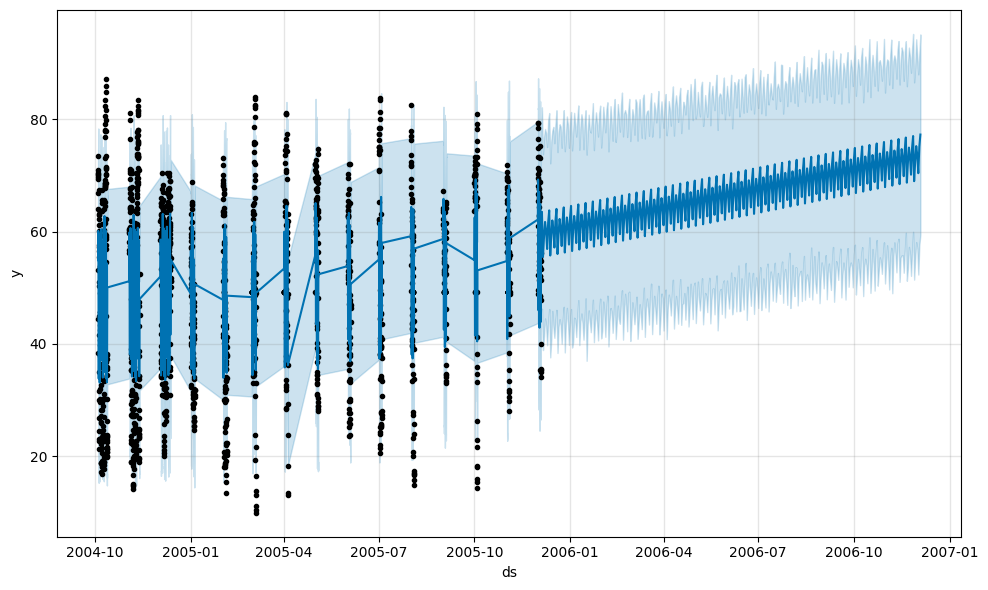

In [339]:
fig1 = model.plot(forecast)